<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall, Surface Air Temperature and its impact on local seafood production

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

Currently, more than 90% of Singapore's food supply is imported (MSE, 2023). In the face of unpredictable geopolitical environmental situations such as climate change, disease outbreaks and depleting natural resources, Singapore needs to increase its food supply resilience (MSE, 2023). The Singapore Food Agency (SFA) aims to increase production of Singapore's food supply locally to 30% by 2030 (MSE, 2023). According to SFA, there are 109 licensed sea-based seafood farms in Singapore.

Climate change causes irregular rainfall patterns and increased temperatures globally. Studies have shown that increased rainfall will decrease the salinity of seawater and increased air surface temperature will lead to stratification of the ocean which increases seawater temperature (Capotondi et al., 2012; Machado Toffolo et al., 2022). Elevated temperatures and reduced salinity of seawater have been shown to negatively affect the physiology of marine species (Marques et al., 2010). For instance, increasing temperatures will decrease the marine organism's ability to detoxify toxic contaminants that are accumulated in their bodies leading to decreased survival rates (Marques et al., 2010).

In addition, temperature and salinity are known to affect the reproduction in marine fishes (Servili et al., 2020). Low water salinity levels will affect the egg development, fertilization and hatching rate of marine fishes (Servili et al., 2020). Meanwhile, increased water temperatures are known to damage fish gonads (the sexual organs of fishes) and irreversibly affect fish larval growth leading to malformations and sex differentiation (Servili et al., 200).


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** [Seafood Supply And Wholesale](https://tablebuilder.singstat.gov.sg/table/TS/M890741)

## Problem Statement

Singapore's surface air temperature and rainfall pattern could affect the amount of local seafood production.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
list = [30, 20, 11, 40, 35]
def calculate_mean(list):
    sum = 0
    for i in list:
        sum += i
    mean = sum/len(list)
    return mean

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def calculate_std(list):
    x = 0
    for i in list:
        x += (i-calculate_mean(list))**2
    std = ((1/len(list))*x)**0.5
    return std

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [3]:
# Imports:
import pandas as pd
import numpy as np
import os 
if not os.path.exists('data'):
    os.makedirs('data')
import matplotlib.pyplot as plt

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### Import Dataset

In [4]:
air_temp = pd.read_csv('../data/surface-air-temperature-monthly-mean-daily-minimum.csv')
rainfall = pd.read_csv('../data/rainfall-monthly-total.csv')
raindays = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
seafood = pd.read_csv('../data/seafood-supply-and-wholesale.csv')

#### Inspection of Air Temperature Dataset

In [5]:
# Obtain dataset info
print(air_temp.info())
air_temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                497 non-null    object 
 1   temp_mean_daily_min  497 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
None


,month,temp_mean_daily_min
0,1982-01,23.3
1,1982-02,23.9
2,1982-03,24.3
3,1982-04,24.3
4,1982-05,25.2


At first glance, the dataset for air temperature seems clean as the month and temp_mean_daily_min have the same non-null count. To confirm that there are no missing values, a sum of null is done.

In [6]:
# Check for null 
air_temp.isnull().sum()

month                  0
temp_mean_daily_min    0
dtype: int64

As confirmed from the code above, there are no null values in the dataset for air temperature.

#### Inspection of Rainfall Dataset

In [7]:
# Obtain dataset info
print(rainfall.info())
rainfall.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB
None


,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


At first glance, the dataset for rainfall seems clean as the month and total_rainfall have the same non-null count. To confirm that there are no missing values, a sum of null is done.

In [8]:
# Check for null
rainfall.isnull().sum()

month             0
total_rainfall    0
dtype: int64

As confirmed from the code above, there are no null values in the dataset for rainfall.

#### Inspection of no. of Rainy Days Dataset

In [9]:
# Obtain dataset info
print(raindays.info())
raindays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB
None


,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


At first glance, the dataset for no. of rainy days seems clean as the month and no_of_rainy_days have the same non-null count. To confirm that there are no missing values, a sum of null is done.

In [10]:
# Check for null
raindays.isnull().sum()

month               0
no_of_rainy_days    0
dtype: int64

As confirmed from the code above, there are no null values in the dataset for no. of rainy days.

#### Inspection of Seafood Dataset

In [11]:
# Obtain datset info
print(seafood.info())
seafood.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Columns: 288 entries, Unnamed: 0 to Unnamed: 287
dtypes: object(288)
memory usage: 87.9+ KB
None


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287
0,Theme: Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Subject: Agriculture, Animal Production and Fi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Topic: Food Supply,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Table Title: Seafood Supply And Wholesale, Mon...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The info shows that there are 39 row entries and 288 unnamed columns. Based on the first 5 rows of data the first 4 rows (Index 0 to 3) does not contain any valuable information required for the analysis and should be removed. In order to have a better understanding of the entire seafood dataset, it will be displayed below.

In [12]:
# Display seafood dataset
seafood

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287
0,Theme: Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Subject: Agriculture, Animal Production and Fi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Topic: Food Supply,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Table Title: Seafood Supply And Wholesale, Mon...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Data last updated: 30/12/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Source: AGRI-FOOD AND VETERINARY AUTHORITY, SI...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tonnes
9,Data Series,2022 Nov,2022 Oct,2022 Sep,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,...,1999 Oct,1999 Sep,1999 Aug,1999 Jul,1999 Jun,1999 May,1999 Apr,1999 Mar,1999 Feb,1999 Jan


From the table displayed above, we can tell that row indexes (0 to 8) and (14 to 38) does not contain any information of interest to be analysed. Hence, these rows will be removed in the subsequent steps.

In [13]:
# Drop blank rows that does not contain dataset required
seafood.drop(range(0,9), inplace=True)
seafood

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287
9,Data Series,2022 Nov,2022 Oct,2022 Sep,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,...,1999 Oct,1999 Sep,1999 Aug,1999 Jul,1999 Jun,1999 May,1999 Apr,1999 Mar,1999 Feb,1999 Jan
10,Local Landings Of Seafood,13,14,16,17,15,15,17,16,18,...,na,na,na,na,na,na,na,na,na,na
11,Imports Of Seafood,na,na,na,na,na,na,9382,10469,9538,...,9974,14783,12555,12762,11617,7793,7375,9544,7546,8477
12,Exports Of Seafood,na,na,na,na,na,na,1030,1162,1061,...,5939,7848,8312,9699,8661,7389,5381,7152,7777,7822
13,Seafood Wholesale,2482,2601,2589,2724,2467,2503,2319,2897,2910,...,na,na,na,na,na,na,na,na,na,na
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,"Seafood refers to fish, crustaceans and molluscs.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Local Landings Of Seafood (Tonnes):,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Refers to seafood catch from local waters. Pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Drop blank rows that does not contain dataset required
seafood.drop(range(14,39), inplace=True)
seafood

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287
9,Data Series,2022 Nov,2022 Oct,2022 Sep,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,...,1999 Oct,1999 Sep,1999 Aug,1999 Jul,1999 Jun,1999 May,1999 Apr,1999 Mar,1999 Feb,1999 Jan
10,Local Landings Of Seafood,13,14,16,17,15,15,17,16,18,...,na,na,na,na,na,na,na,na,na,na
11,Imports Of Seafood,na,na,na,na,na,na,9382,10469,9538,...,9974,14783,12555,12762,11617,7793,7375,9544,7546,8477
12,Exports Of Seafood,na,na,na,na,na,na,1030,1162,1061,...,5939,7848,8312,9699,8661,7389,5381,7152,7777,7822
13,Seafood Wholesale,2482,2601,2589,2724,2467,2503,2319,2897,2910,...,na,na,na,na,na,na,na,na,na,na


From the above table, we can see that after dropping all the unncessary rows, the row header is unnamed. Therefore, the next step is to rename the header using the first row (row index 9) and reset the row index for better clarity and visualisation.

In [15]:
# Rename header using first row
seafood.rename(columns=seafood.iloc[0], inplace = True) 

# Reset row index and drop the index column created
seafood.reset_index(drop=True, inplace=True) 
seafood

,Data Series,2022 Nov,2022 Oct,2022 Sep,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,...,1999 Oct,1999 Sep,1999 Aug,1999 Jul,1999 Jun,1999 May,1999 Apr,1999 Mar,1999 Feb,1999 Jan
0,Data Series,2022 Nov,2022 Oct,2022 Sep,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,...,1999 Oct,1999 Sep,1999 Aug,1999 Jul,1999 Jun,1999 May,1999 Apr,1999 Mar,1999 Feb,1999 Jan
1,Local Landings Of Seafood,13,14,16,17,15,15,17,16,18,...,na,na,na,na,na,na,na,na,na,na
2,Imports Of Seafood,na,na,na,na,na,na,9382,10469,9538,...,9974,14783,12555,12762,11617,7793,7375,9544,7546,8477
3,Exports Of Seafood,na,na,na,na,na,na,1030,1162,1061,...,5939,7848,8312,9699,8661,7389,5381,7152,7777,7822
4,Seafood Wholesale,2482,2601,2589,2724,2467,2503,2319,2897,2910,...,na,na,na,na,na,na,na,na,na,na


After renaming the headers, the next step would be to transpose the table above so that the first column will become the header and the new first column will contain the data for datetime. This is to match the dataframe format for the air temperature, rainfall and no. of rainy days dataset.

In [16]:
# Transpose columns to rows
seafood = seafood.transpose() 

# Reset row index and drop the index column created
seafood.reset_index(drop=True, inplace=True) 
seafood

,0,1,2,3,4
0,Data Series,Local Landings Of Seafood,Imports Of Seafood,Exports Of Seafood,Seafood Wholesale
1,2022 Nov,13,na,na,2482
2,2022 Oct,14,na,na,2601
3,2022 Sep,16,na,na,2589
4,2022 Aug,17,na,na,2724
...,...,...,...,...,...
283,1999 May,na,7793,7389,na
284,1999 Apr,na,7375,5381,na
285,1999 Mar,na,9544,7152,na
286,1999 Feb,na,7546,7777,na


After transposing the seafood dataset, the header has been renamed to indexes. In the subsequent steps below, the row index 0 will be used as header and the first column will be renamed to 'month' so that it can be merged with the other datasets (air temperature and rainfall).

In [17]:
# Rename header using first row
seafood.rename(columns=seafood.iloc[0], inplace = True) 
seafood.head()

,Data Series,Local Landings Of Seafood,Imports Of Seafood,Exports Of Seafood,Seafood Wholesale
0,Data Series,Local Landings Of Seafood,Imports Of Seafood,Exports Of Seafood,Seafood Wholesale
1,2022 Nov,13,na,na,2482
2,2022 Oct,14,na,na,2601
3,2022 Sep,16,na,na,2589
4,2022 Aug,17,na,na,2724


In [18]:
# Drop first row because same as header
seafood.drop(range(0,1), inplace=True) 

# Rename Data Series to month
seafood.rename(columns={"Data Series": "month"}, inplace=True) 

In [19]:
seafood.head()

,month,Local Landings Of Seafood,Imports Of Seafood,Exports Of Seafood,Seafood Wholesale
1,2022 Nov,13,na,na,2482
2,2022 Oct,14,na,na,2601
3,2022 Sep,16,na,na,2589
4,2022 Aug,17,na,na,2724
5,2022 Jul,15,na,na,2467


Now that the seafood dataset is in the ideal format, it is time to inspect the seafood dataset again as we are able to see some na in the first 5 rows.

#### Inspection and further cleaning of Seafood Dataset after initial cleaning

In [20]:
# Obtain datset info
seafood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 1 to 287
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   month                      287 non-null    object
 1   Local Landings Of Seafood  287 non-null    object
 2   Imports Of Seafood         287 non-null    object
 3   Exports Of Seafood         287 non-null    object
 4   Seafood Wholesale          287 non-null    object
dtypes: object(5)
memory usage: 11.3+ KB


From the above we can tell that all the column datatype are object. In addition, from the table above, we can tell that there are some 'na' in the 'Imports Of Seafood' and 'Exports Of Seafood' column. This could mean that the other rows also contains na or that the numbers were entered as strings.
<br><br>As the columns of interest are 'month', 'Local Landings Of Seafood', 'Imports Of Seafood' and 'Exports Of Seafood':
<ul>
    <li>The 'Seafood Wholesale' column will be dropped</li>
    <li>Check if there are any strange entries besides 'na'</li>
    <li>Replace 'na' with null</li>
    <li>The 'month' column will be converted into datetime</li>
    <li>The 'Local Landings Of Seafood', 'Imports Of Seafood' and 'Exports Of Seafood' columns will be converted into float</li>
</ul>

In [21]:
# Drop columns that will not be used.
seafood.drop(columns=['Seafood Wholesale'], inplace=True) 

In [22]:
# Check for unique values in 'Local Landings Of Seafood'
seafood['Local Landings Of Seafood'].unique()

array(['13', '14', '16', '17', '15', '18', '21', '32', '23', '27', '25',
       '12', '29', '31', '28', '33', '34', '38', '35', '71', '77', '178',
       '85', '340', '221', '111', '94', '110', '49', '52', '73', '114',
       '188', '147', '143', '119', '113', '148', '121', '66', '39', '40',
       '36', '63', '123', '91', '156', '125', '102', '101', '50', '118',
       '126', '128', '132', '116', '151', '103', '98', '115', '54', '56',
       '67', '112', '117', '100', '105', '75', '153', '157', '168', '141',
       '129', '140', '95', '122', '107', '93', '104', '80', '173', '131',
       '130', '144', '150', '149', '179', '204', '158', '172', '192',
       '189', '167', '165', '127', '166', '57', '176', '180', '155',
       '133', '65', '191', '135', '241', '160', '37', '99', '184', '197',
       '206', '212', '174', '205', '162', '106', '217', '199', '163',
       '124', '120', '175', '225', '387', '325', '385', '396', '298',
       '277', '367', '223', '208', '219', '287', '281', '2

In [23]:
# Check for unique values in 'Imports Of Seafood'
seafood['Imports Of Seafood'].unique()

array(['na', '9382', '10469', '9538', '7515', '10749', '12310', '11127',
       '9726', '10046', '9957', '9778', '9638', '10094', '10574', '11025',
       '8385', '11140', '13369', '10982', '11513', '11335', '10370',
       '11595', '9776', '8245', '12077', '10329', '8418', '10499',
       '11887', '11235', '12127', '9783', '10371', '12235', '8332',
       '10783', '10591', '9208', '6972', '11879', '11297', '11046',
       '11523', '10295', '10818', '10116', '9175', '9607', '9444', '9138',
       '7282', '11465', '9986', '9838', '10984', '9081', '11073', '9416',
       '9303', '9397', '9467', '10597', '7873', '9336', '10029', '10607',
       '10525', '10052', '10846', '9218', '9601', '8940', '9413', '10076',
       '7478', '10078', '11294', '10821', '10380', '10314', '10942',
       '9333', '9662', '9818', '9950', '8653', '9814', '11019', '9762',
       '11321', '10628', '9351', '10267', '10051', '9861', '10125',
       '7625', '10247', '10963', '10188', '11120', '10967', '9854',
     

In [24]:
# Check for unique values in 'Exports Of Seafood'
seafood['Exports Of Seafood'].unique()

array(['na', '1030', '1162', '1061', '1423', '1200', '1697', '1302',
       '1378', '1687', '1945', '1117', '966', '1126', '1124', '2141',
       '2892', '1258', '1262', '1579', '1190', '1565', '1663', '1836',
       '1082', '1404', '1833', '1589', '1294', '1346', '1690', '1359',
       '874', '1815', '2493', '1292', '1245', '1053', '1368', '1018',
       '1606', '1349', '1170', '1625', '1250', '2567', '2048', '1662',
       '1336', '1048', '1398', '1043', '1826', '1539', '1221', '1666',
       '1609', '1837', '1521', '1156', '1045', '907', '2221', '1542',
       '1280', '1633', '1353', '2416', '1712', '1987', '1345', '1532',
       '1281', '1179', '1953', '1439', '1628', '2207', '2054', '1863',
       '1545', '1948', '2976', '1491', '1581', '1901', '2100', '1738',
       '1421', '1130', '1207', '1500', '1287', '1597', '1279', '1216',
       '1672', '1477', '984', '1907', '1547', '1830', '1777', '2179',
       '2273', '2544', '3243', '1702', '1454', '2939', '2339', '1796',
       '3612

No other values besides 'na' and numbers were observed. Hence, can proceed to replace 'na' with null.

In [25]:
# Replace na with null
seafood['Local Landings Of Seafood'].replace('na', np.nan, inplace = True)
seafood['Imports Of Seafood'].replace('na', np.nan, inplace = True)
seafood['Exports Of Seafood'].replace('na', np.nan, inplace = True)

# Convert month to datetime for seafood
seafood['month'] = pd.to_datetime(seafood['month'], format='mixed')

# Convert Local 'Landings Of Seafood', 'Imports Of Seafood' and 'Exports Of Seafood' columns to float
seafood['Local Landings Of Seafood'] = seafood['Local Landings Of Seafood'].astype(float)
seafood['Imports Of Seafood'] = seafood['Imports Of Seafood'].astype(float)
seafood['Exports Of Seafood'] = seafood['Exports Of Seafood'].astype(float)

print(seafood.info())
seafood.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 1 to 287
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      287 non-null    datetime64[ns]
 1   Local Landings Of Seafood  251 non-null    float64       
 2   Imports Of Seafood         281 non-null    float64       
 3   Exports Of Seafood         281 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 9.1 KB
None


,month,Local Landings Of Seafood,Imports Of Seafood,Exports Of Seafood
1,2022-11-01,13.0,NaN,NaN
2,2022-10-01,14.0,NaN,NaN
3,2022-09-01,16.0,NaN,NaN
4,2022-08-01,17.0,NaN,NaN
5,2022-07-01,15.0,NaN,NaN


From the above, we are able to tell that the datatypes have been successfully converted. The next step would be to inspect the null values in each column of 'Local Landings Of Seafood', 'Imports Of Seafood' and 'Exports Of Seafood'.

##### Inspection of null values

In [26]:
# Percentage of null values for 'Local Landings Of Seafood'
seafood['Local Landings Of Seafood'].isnull().value_counts(normalize=True)

Local Landings Of Seafood
False    0.874564
True     0.125436
Name: proportion, dtype: float64

In [27]:
# Percentage of null values for 'Imports Of Seafood'
seafood['Imports Of Seafood'].isnull().value_counts(normalize=True)

Imports Of Seafood
False    0.979094
True     0.020906
Name: proportion, dtype: float64

In [28]:
# Percentage of null values for 'Exports Of Seafood'
seafood['Exports Of Seafood'].isnull().value_counts(normalize=True)

Exports Of Seafood
False    0.979094
True     0.020906
Name: proportion, dtype: float64

**Inspection of null values** <br>Based on the null values check, Both 'Imports Of Seafood' and 'Exports Of Seafood' have 2% null values which is negligible and can be dropped. However, 'Local Landings Of Seafood' have 12.54% null values which seems significant. Hence, the next step would be:
<ul>
    <li>Determine if a proxy value (e.g., mean, std) can be used to replace the null values</li>
    <li>Time periods where the Landings Of Seafood is null</li>
    <li>Deciding if the null values can be dropped</li>
</ul>

##### Line graph of 'Local Landings Of Seafood' against time

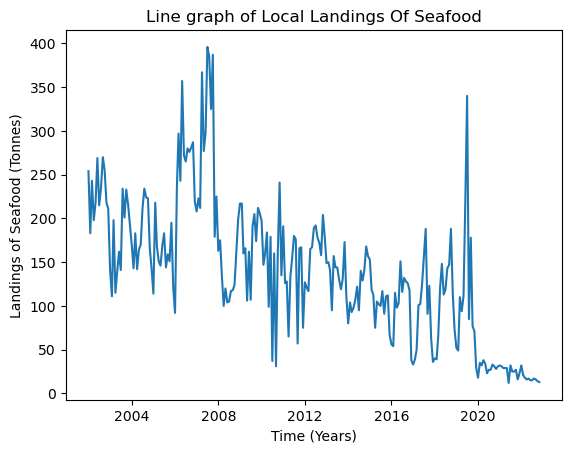

In [29]:
# Line graph of Local Landings of Seafood
plt.plot(seafood['month'],seafood['Local Landings Of Seafood'])
plt.xlabel('Time (Years)')
plt.ylabel('Landings of Seafood (Tonnes)')
plt.title('Line graph of Local Landings Of Seafood');

##### Table of null values for 'Local Landings Of Seafood'

In [30]:
# Filter null values
seafood.loc[seafood['Local Landings Of Seafood'].isnull(), :]

,month,Local Landings Of Seafood,Imports Of Seafood,Exports Of Seafood
252,2001-12-01,NaN,7629.0,4174.0
253,2001-11-01,NaN,8263.0,5102.0
254,2001-10-01,NaN,9471.0,6241.0
255,2001-09-01,NaN,8112.0,5581.0
256,2001-08-01,NaN,8872.0,6309.0
257,2001-07-01,NaN,9809.0,6358.0
258,2001-06-01,NaN,6906.0,6909.0
259,2001-05-01,NaN,7916.0,6731.0
260,2001-04-01,NaN,10096.0,7289.0
261,2001-03-01,NaN,9977.0,7625.0


**Null values conclusion**<br>
Based on the line graph above, the landings of seafood (seafood catch) is very erratic. Hence, it would be risky to replace the null values with the mean or std. In addition, the missing values are from the period 1999 to 2001 which is more than 20 years ago. Therefore, the data can be dropped as it would not be as relevant for comparison with the local seafood production and food resilience due to climate change in recent years.
<ul>
    <li>'Imports Of Seafood' and 'Exports Of Seafood' null values dropped as it is neligible: 2%</li>
    <li>'Local Landings Of Seafood' null values dropped as the amount over the years are erratic and null periods will not be relevant for comparison with current situation</li>
</ul>

In [31]:
# Drop null values from 'Local Landings Of Seafood' 'Imports Of Seafood' and 'Exports Of Seafood' 
seafood.dropna(subset=['Local Landings Of Seafood', 'Imports Of Seafood', 'Exports Of Seafood'],inplace=True)
seafood.head()

,month,Local Landings Of Seafood,Imports Of Seafood,Exports Of Seafood
7,2022-05-01,17.0,9382.0,1030.0
8,2022-04-01,16.0,10469.0,1162.0
9,2022-03-01,18.0,9538.0,1061.0
10,2022-02-01,21.0,7515.0,1423.0
11,2022-01-01,32.0,10749.0,1200.0


#### Data Cleaning

After cleaning up the seafood data, the next step would be to.
<ul>
    <li>Change 'month' to datetime format</li>
    <li>Merge the dataframes together</li>
    <li>Rename column headers to standardise naming convention</li>
    <li>Export cleaned dataset</li>
</ul>

In [32]:
# Convert month to datetime for rainfall, air_temp and raindays
rainfall['month'] = pd.to_datetime(rainfall['month'], format='%Y-%m')
air_temp['month'] = pd.to_datetime(air_temp['month'], format='%Y-%m') 
raindays['month'] = pd.to_datetime(raindays['month'], format='%Y-%m')

In [33]:
# Merge seafood with rainfall
data = pd.merge(left = seafood, right = rainfall, how='left') 
data.head()

,month,Local Landings Of Seafood,Imports Of Seafood,Exports Of Seafood,total_rainfall
0,2022-05-01,17.0,9382.0,1030.0,102.0
1,2022-04-01,16.0,10469.0,1162.0,239.6
2,2022-03-01,18.0,9538.0,1061.0,163.2
3,2022-02-01,21.0,7515.0,1423.0,175.0
4,2022-01-01,32.0,10749.0,1200.0,99.8


In [34]:
# Merge seafood + rainfall with air temp
df = pd.merge(left = data, right = air_temp, how='left') 
df.head()

,month,Local Landings Of Seafood,Imports Of Seafood,Exports Of Seafood,total_rainfall,temp_mean_daily_min
0,2022-05-01,17.0,9382.0,1030.0,102.0,26.2
1,2022-04-01,16.0,10469.0,1162.0,239.6,25.1
2,2022-03-01,18.0,9538.0,1061.0,163.2,25.1
3,2022-02-01,21.0,7515.0,1423.0,175.0,24.8
4,2022-01-01,32.0,10749.0,1200.0,99.8,24.9


In [35]:
# Remaning because SFA labeled incorrectly. They also named the annual air_temp as mean_daily
df.rename(columns={"temp_mean_daily_min": "month_mean_temp"}, inplace=True) 

# Rename to standardize
df.rename(columns={"Exports Of Seafood": "exports_of_seafood"}, inplace=True) 
df.rename(columns={"Imports Of Seafood": "imports_of_seafood"}, inplace=True)
df.rename(columns={"Local Landings Of Seafood": "seafood_catch"}, inplace=True)
df.head()

,month,seafood_catch,imports_of_seafood,exports_of_seafood,total_rainfall,month_mean_temp
0,2022-05-01,17.0,9382.0,1030.0,102.0,26.2
1,2022-04-01,16.0,10469.0,1162.0,239.6,25.1
2,2022-03-01,18.0,9538.0,1061.0,163.2,25.1
3,2022-02-01,21.0,7515.0,1423.0,175.0,24.8
4,2022-01-01,32.0,10749.0,1200.0,99.8,24.9


In [36]:
# Save and export cleaned data 
df.to_csv('../data/cleaned_data.csv', index = False) 

### Data Dictionary



|Feature|Type|Dataset|Description|
|---|---|---|---|
|month|datetime|seafood-supply-and-wholesale|every month from 2002 to may 2022| 
|seafood_catch|float|seafood-supply-and-wholesale|amount of seafood caught from Singapore waters in Tonnes| 
|imports_of_seafood|float|seafood-supply-and-wholesale|amount of seafood imported by Singapore in Tonnes|
|exports_of_seafood|float|seafood-supply-and-wholesale|amount of seafood exported from Singapore in Tonnes| 
|total_rainfall|float|rainfall-monthly-total|total monthly rainfall in mm| 
|month_mean_temp|float|surface-air-temperature-monthly-mean-daily-minimum|mean monthly surface air temperature in °C| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

**Summary Statistics**

In [37]:
df.describe(exclude='datetime').round(2)

,seafood_catch,imports_of_seafood,exports_of_seafood,total_rainfall,month_mean_temp
count,245.00,245.00,245.00,245.00,245.00
mean,141.96,10738.98,2910.72,175.34,25.18
std,78.26,1520.29,1632.73,113.02,0.68
min,12.00,6810.00,874.00,0.20,23.50
25%,95.00,9783.00,1545.00,99.80,24.60
50%,141.00,10745.00,2416.00,159.40,25.20
75%,188.00,11622.00,4017.00,236.80,25.60
max,396.00,14756.00,7442.00,765.90,27.10


**Dictionary Comprehension**

In [38]:
# Convert df to dictionary with header as key and column values as list
output = df.to_dict('list')

In [39]:
# Delete the month key
del output['month'] 

In [40]:
# Dictionary comprehension
{key:round(calculate_std(values),2) for key,values in output.items()}

{'seafood_catch': 78.1,
 'imports_of_seafood': 1517.18,
 'exports_of_seafood': 1629.39,
 'total_rainfall': 112.79,
 'month_mean_temp': 0.68}

**Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?**

In [41]:
# Filter year 1990
rainfall_1990 = rainfall.loc[rainfall['month'].dt.year == 1990, :] 
# Filter year 2000
rainfall_2000 = rainfall.loc[rainfall['month'].dt.year == 2000, :] 
# Filter year 2010
rainfall_2010 = rainfall.loc[rainfall['month'].dt.year == 2010, :] 
# Filter year 2020
rainfall_2020 = rainfall.loc[rainfall['month'].dt.year == 2020, :] 

In [42]:
# Highest rainfall in 1990
print('Sep had the highest rainfall in 1990.')
rainfall_1990.query('total_rainfall == total_rainfall.max()') #Obtain highest rainfall in 1990

Sep had the highest rainfall in 1990.


,month,total_rainfall
104,1990-09-01,204.5


In [43]:
# Lowest rainfall in 1990
print('Feb had the lowest rainfall in 1990.')
rainfall_1990.query('total_rainfall == total_rainfall.min()') #Obtain lowest rainfall in 1990

Feb had the lowest rainfall in 1990.


,month,total_rainfall
97,1990-02-01,24.1


In [44]:
# Highest rainfall in 2000
print('Nov had the highest rainfall in 2000.')
rainfall_2000.query('total_rainfall == total_rainfall.max()') #Obtain highest rainfall in 2000

Nov had the highest rainfall in 2000.


,month,total_rainfall
226,2000-11-01,385.7


In [45]:
# Lowest rainfall in 2000
print('Sep had the lowest rainfall in 2000.')
rainfall_2000.query('total_rainfall == total_rainfall.min()') #Obtain lowest rainfall in 2000

Sep had the lowest rainfall in 2000.


,month,total_rainfall
224,2000-09-01,81.1


In [46]:
# Highest rainfall in 2010
print('Jul had the highest rainfall in 2010.')
rainfall_2010.query('total_rainfall == total_rainfall.max()') #Obtain highest rainfall in 2010

Jul had the highest rainfall in 2010.


,month,total_rainfall
342,2010-07-01,298.5


In [47]:
# Lowest rainfall in 2010
print('Feb had the lowest rainfall in 2010.')
rainfall_2010.query('total_rainfall == total_rainfall.min()') #Obtain lowest rainfall in 2010

Feb had the lowest rainfall in 2010.


,month,total_rainfall
337,2010-02-01,6.3


In [48]:
# Highest rainfall in 2020
print('May had the highest rainfall in 2020.')
rainfall_2020.query('total_rainfall == total_rainfall.max()') #Obtain highest rainfall in 2020

May had the highest rainfall in 2020.


,month,total_rainfall
460,2020-05-01,255.6


In [49]:
# Lowest rainfall in 2020
print('Feb had the lowest rainfall in 2020.')
rainfall_2020.query('total_rainfall == total_rainfall.min()') #Obtain lowest rainfall in 2020

Feb had the lowest rainfall in 2020.


,month,total_rainfall
457,2020-02-01,65.0


**Which year have the highest and lowest total rainfall in the date range of analysis?**

In [50]:
# Filter rainfall periods 1990, 2000, 2010 and 2020
rainfall_filter = rainfall[rainfall['month'].dt.year.isin([1990,2000,2010,2020])]
rainfall_filter.sort_values('total_rainfall').head()

,month,total_rainfall
337,2010-02-01,6.3
97,1990-02-01,24.1
99,1990-04-01,52.4
105,1990-10-01,56.4
457,2020-02-01,65.0


In [51]:
# Filter highest rainfall amount
rainfall_filter.sort_values('total_rainfall', ascending = False).head()

,month,total_rainfall
226,2000-11-01,385.7
219,2000-04-01,311.6
342,2010-07-01,298.5
346,2010-11-01,278.8
216,2000-01-01,275.2


The year 2000 had the highest total rainfall

In [52]:
# Filter lowest rainfall amount
rainfall_filter.sort_values('total_rainfall').head()

,month,total_rainfall
337,2010-02-01,6.3
97,1990-02-01,24.1
99,1990-04-01,52.4
105,1990-10-01,56.4
457,2020-02-01,65.0


The year 2010 had the lowest total rainfall.

**Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?**

In [53]:
# Filter year 1990
raindays_1990 = raindays.loc[raindays['month'].dt.year == 1990, :] 
# Filter year 2000
raindays_2000 = raindays.loc[raindays['month'].dt.year == 2000, :] 
# Filter year 2010
raindays_2010 = raindays.loc[raindays['month'].dt.year == 2010, :] 
# Filter year 2020
raindays_2020 = raindays.loc[raindays['month'].dt.year == 2020, :] 

In [54]:
# Highest rain days in 1990
print('Both Sep and Nov had the highest rainy days in 1990.')
raindays_1990.query('no_of_rainy_days == no_of_rainy_days.max()') #Obtain highest rainy days in 1990

Both Sep and Nov had the highest rainy days in 1990.


,month,no_of_rainy_days
104,1990-09-01,17
106,1990-11-01,17


In [55]:
# Lowest rain days in 1990
print('Mar had the lowest rainy days in 1990.')
raindays_1990.query('no_of_rainy_days == no_of_rainy_days.min()') #Obtain lowest rainy days in 1990

Mar had the lowest rainy days in 1990.


,month,no_of_rainy_days
98,1990-03-01,4


In [56]:
# Highest rain days in 2000
print('Nov had the highest rainy days in 2000.')
raindays_2000.query('no_of_rainy_days == no_of_rainy_days.max()') #Obtain highest rainy days in 2000

Nov had the highest rainy days in 2000.


,month,no_of_rainy_days
226,2000-11-01,21


In [57]:
# Lowest rain days in 2000
print('May had the lowest rainy days in 2000.')
raindays_2000.query('no_of_rainy_days == no_of_rainy_days.min()') #Obtain lowest rainy days in 2000

May had the lowest rainy days in 2000.


,month,no_of_rainy_days
220,2000-05-01,10


In [58]:
# Highest rain days in 2010
print('Nov had the highest rainy days in 2010.')
raindays_2010.query('no_of_rainy_days == no_of_rainy_days.max()') #Obtain highest rainy days in 2010

Nov had the highest rainy days in 2010.


,month,no_of_rainy_days
346,2010-11-01,21


In [59]:
# Lowest rain days in 2010
print('Feb had the lowest rainy days in 2010.')
raindays_2010.query('no_of_rainy_days == no_of_rainy_days.min()') #Obtain lowest rainy days in 2010

Feb had the lowest rainy days in 2010.


,month,no_of_rainy_days
337,2010-02-01,4


In [60]:
# Highest rain days in 2020
print('Jul had the highest rainy days in 2020.')
raindays_2020.query('no_of_rainy_days == no_of_rainy_days.max()') #Obtain highest rainy days in 2020

Jul had the highest rainy days in 2020.


,month,no_of_rainy_days
462,2020-07-01,22


In [61]:
# Lowest rain days in 2020
print('Jan had the lowest rainy days in 2020.')
raindays_2020.query('no_of_rainy_days == no_of_rainy_days.min()') #Obtain lowest rainy days in 2020

Jan had the lowest rainy days in 2020.


,month,no_of_rainy_days
456,2020-01-01,6


**Which year have the highest and lowest number of rainy days in the date range of analysis?**

In [62]:
# Filter rainy days periods 1990, 2000, 2010 and 2020
raindays_filter = raindays[raindays['month'].dt.year.isin([1990,2000,2010,2020])]
raindays_filter.sort_values('no_of_rainy_days').head()

,month,no_of_rainy_days
98,1990-03-01,4
337,2010-02-01,4
456,2020-01-01,6
97,1990-02-01,8
457,2020-02-01,8


In [63]:
# Filter highest rainy days period
raindays_filter.sort_values('no_of_rainy_days', ascending = False).head()

,month,no_of_rainy_days
462,2020-07-01,22
461,2020-06-01,21
226,2000-11-01,21
346,2010-11-01,21
467,2020-12-01,20


The year 2020 had the highest number of rainy days.

In [64]:
# Filter lowest rainy days period
raindays_filter.sort_values('no_of_rainy_days').head()

,month,no_of_rainy_days
98,1990-03-01,4
337,2010-02-01,4
456,2020-01-01,6
97,1990-02-01,8
457,2020-02-01,8


The years 1990 and 2010 had the lowest number of rainy days. 

**Are there any outliers months in the dataset?**

In [65]:
# Outliers are greater than 75th percentile + 1.5 IQR or than 25th percentile -1.5 IQR.

**Boxplot of Rainfall**

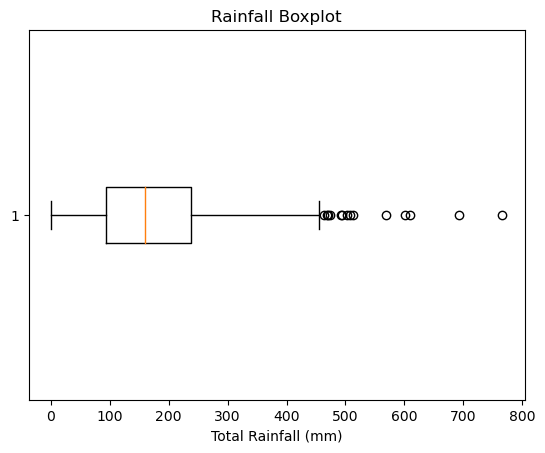

In [66]:
rainfall_boxplot = plt.boxplot(rainfall['total_rainfall'], vert = False)
plt.title('Rainfall Boxplot')
plt.xlabel('Total Rainfall (mm)');

**Rainfall Outlier**

In [67]:
# Obtain outlier data
outliers_rainfall = rainfall_boxplot["fliers"][0].get_xdata()

In [68]:
# Return months that matches outlier values
rainfall_outliers_months = rainfall[rainfall['total_rainfall'].isin(outliers_rainfall)]
print('The following months are outliers in the rainfall dataset.')
rainfall_outliers_months['month']

The following months are outliers in the rainfall dataset.


11    1982-12-01
25    1984-02-01
60    1987-01-01
94    1989-11-01
119   1991-12-01
130   1992-11-01
131   1992-12-01
203   1998-12-01
239   2001-12-01
264   2004-01-01
299   2006-12-01
311   2007-12-01
348   2011-01-01
468   2021-01-01
Name: month, dtype: datetime64[ns]

**Boxplot of Rainy Days**

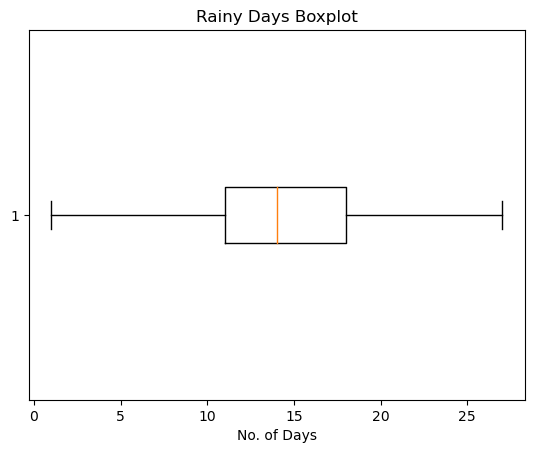

In [69]:
raindays_boxplot = plt.boxplot(raindays['no_of_rainy_days'], vert=False)
plt.title('Rainy Days Boxplot')
plt.xlabel('No. of Days');

**Rainy Days Outlier**

In [70]:
# Obtain outlier data
outliers_raindays = raindays_boxplot["fliers"][0].get_xdata()

In [71]:
# Return months that matches outlier values
raindays_outliers_months = raindays[raindays['no_of_rainy_days'].isin(outliers_raindays)]
print('There are no outliers in the rainy days dataset.')
raindays_outliers_months['month']

There are no outliers in the rainy days dataset.


Series([], Name: month, dtype: datetime64[ns])

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

### Data Visualization and Interpretation 

Increased temperatures and decreasing water salinity due to rainfall negatively affects the physiology of marine creatures. Thus, it is of interest to explore the relationship between quantity of seafood caught from Singapore's waters with air surface temperature and rainfall amount in this dataset. If seafood catch decrease, one would expect seafood import to increase and seafood export to decrease and vice versa. Therefore, the amount of seafood imported and exported would be analysed as well.

#### Figure 1. Scatter plot of Singapore's seafood catch against monthly mean temperature

The range of seafood catch, imports of seafood, exports of seafood, total rainfall and temperature were obtained to assist in plotting the graphs.

In [72]:
# Determine range of values in dataset
df.describe(exclude=['datetime']).loc[['min', 'max']]

,seafood_catch,imports_of_seafood,exports_of_seafood,total_rainfall,month_mean_temp
min,12.0,6810.0,874.0,0.2,23.5
max,396.0,14756.0,7442.0,765.9,27.1


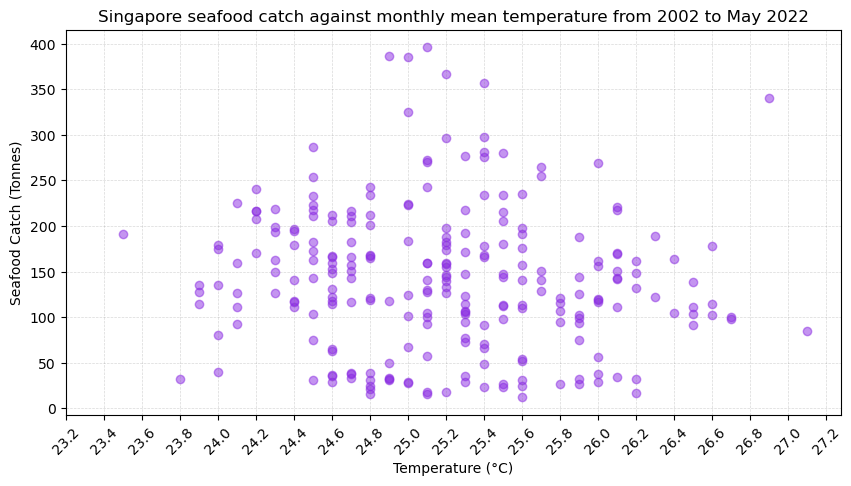

In [73]:
plt.figure(figsize=(10, 5))
plt.scatter( df['month_mean_temp'], df['seafood_catch'], color='blueviolet', alpha = 0.5)
plt.title('Singapore seafood catch against monthly mean temperature from 2002 to May 2022')
plt.xlabel('Temperature (°C)')
plt.xticks(np.arange(23.2,27.4,0.2), rotation = 45)
plt.ylabel('Seafood Catch (Tonnes)')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha = 0.3)
plt.show()

Figure 1 shows the amount of seafood catch in Singapore against the monthly mean temperature. Most of the catch seems to be between 24.5°C and 25.4°C. It is also noticeable that as temperature rises above 25.4°C, the seafood catch starts to decrease.

#### Figure 2. Scatter plot of Singapore's seafood catch against monthly mean total rainfall

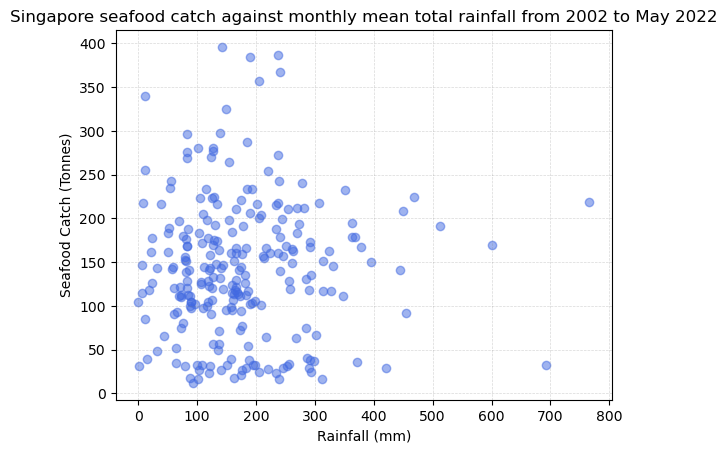

In [74]:
plt.scatter(df['total_rainfall'],df['seafood_catch'], color='royalblue', alpha = 0.5)
plt.title('Singapore seafood catch against monthly mean total rainfall from 2002 to May 2022')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Seafood Catch (Tonnes)')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha = 0.3)
plt.show()

Figure 2 shows the amount of seafood catch in Singapore against the monthly mean total rainfall. It seems that most of the seafood catch occurs between 90mm and 250mm of rainfall. The amount of seafood catch were observed to decrease drastically for rainfall levels above 250mm.

To have a better overview of the effects of temperature and rainfall on seafood catch over time, the data will be split into 10 year periods of 2002 to 2011 and 2012 to May 2022.

#### Figure 3. Ten year comparison of Singapore's seafood catch against monthly mean temperature from 2002 to May 2022

In [75]:
# Filter year 2002-2011 (10 years)
df_02_11 = df.loc[(df['month'].dt.year >= 2002) & ((df['month'].dt.year <= 2011)) , :]

# Filter year 2012-2022 (10 years)
df_12_22 = df.loc[(df['month'].dt.year >= 2012) & ((df['month'].dt.year <= 2022)) , :] 

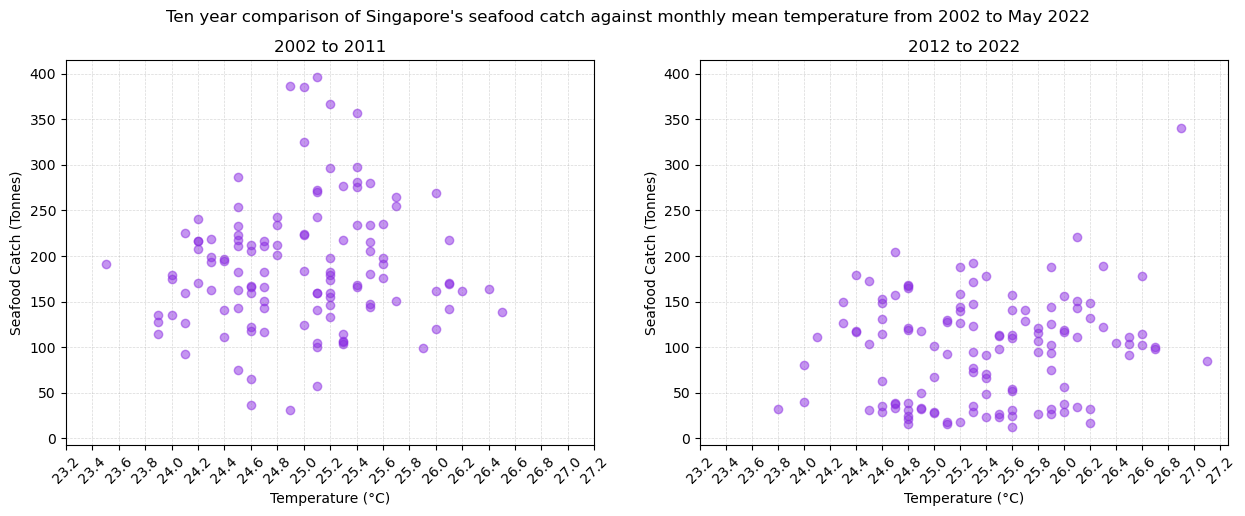

In [76]:
# Set figure size
plt.figure(figsize=(15, 5))

# Plot title of all subplots
plt.suptitle("Ten year comparison of Singapore's seafood catch against monthly mean temperature from 2002 to May 2022")

# assign first subplot to sub1 so that other subplots can share y-axis
sub1 = plt.subplot(1,2,1)
plt.scatter(df_02_11['month_mean_temp'], df_02_11['seafood_catch'],color='blueviolet', alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Seafood Catch (Tonnes)')
plt.title('2002 to 2011')
plt.xticks(np.arange(23.2,27.4,0.2), rotation = 45)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha = 0.3)

plt.subplot(1,2,2, sharey=sub1)
plt.scatter(df_12_22['month_mean_temp'], df_12_22['seafood_catch'],color='blueviolet', alpha = 0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Seafood Catch (Tonnes)')
plt.title('2012 to 2022')
plt.xticks(np.arange(23.2,27.4,0.2), rotation = 45)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha = 0.3)

plt.show()

Figure 3 shows 10 year periods between 2002 to 2011 and 2012 to 2022 of seafood catch against monthly mean surface air temperature. This is to provide a better view of how seafood catch and temperature changes over the years. It is very apparent that the seafood catch has drastically decreased over time and more data points are clustered between the 25.8°C to 26.7°C, indicating that temperature has increased over the years.

#### Figure 4. Ten year comparison of Singapore's seafood catch against monthly mean total rainfall from 2002 to May 2022

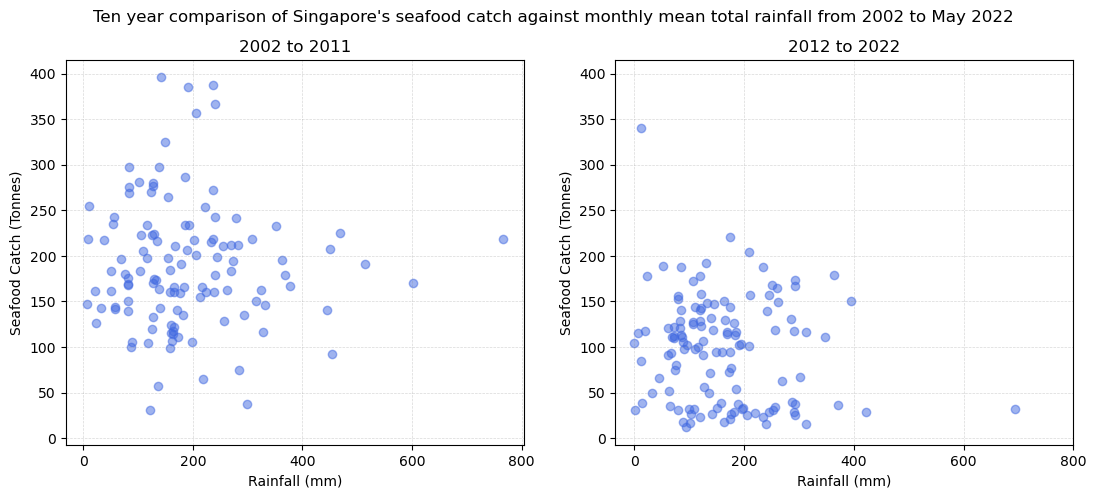

In [77]:
# Set figure size
plt.figure(figsize=(13, 5))

# Plot title of all subplots
plt.suptitle("Ten year comparison of Singapore's seafood catch against monthly mean total rainfall from 2002 to May 2022")

# assign first subplot to sub1 so that other subplots can share y-axis
sub1 = plt.subplot(1,2,1)
plt.scatter(df_02_11['total_rainfall'], df_02_11['seafood_catch'],color='royalblue', alpha=0.5)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Seafood Catch (Tonnes)')
plt.title('2002 to 2011')
plt.xticks(np.arange(0,1000,200))
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha = 0.3)

plt.subplot(1,2,2, sharey=sub1)
plt.scatter(df_12_22['total_rainfall'], df_12_22['seafood_catch'],color='royalblue', alpha = 0.5)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Seafood Catch (Tonnes)')
plt.title('2012 to 2022')
plt.xticks(np.arange(0,1000,200))
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha = 0.3)

plt.show()

Figure 4 shows 10 year periods between 2002 to 2011 and 2012 to 2022 of seafood catch against monthly mean total rainfall. This is to provide a better view of how seafood catch and rainfall amount changes over the years. Similar to monthly mean surface air temperature in Figure 3, the seafood catch was observed to decreased over time as well.

#### Calculation of seafood catch over time

The decrease in seafood catch will be calculated to have a better understanding of the situation.

In [78]:
# Calculate decrease of seafood catch
catch_diff = df_02_11['seafood_catch'].sum() - df_12_22['seafood_catch'].sum()
catch_diff

10475.0

In [79]:
# Calculate % decrease of seafood catch
(catch_diff/df_02_11['seafood_catch'].sum()) * 100

46.294250232023685

Based on the above calculations, the amount of seafood catch has significantly decreased over the last 10 years by 10,475 Tonnes which is 46.29%.

#### Checking of mean monthly temperature and rainfall over the years

##### Table 1. Mean, min and max temperature and rainfall from 2002 to 2011

In [80]:
# Mean monthly temperature and rainfall from 2002 to 2011
df_02_11[['month_mean_temp','total_rainfall']].describe().loc[['mean','min','max']].round(2)

,month_mean_temp,total_rainfall
mean,24.96,189.1
min,23.50,6.3
max,26.50,765.9


##### Table 2. Mean, min and max temperature and rainfall from 2012 to May 2022

In [81]:
# Mean monthly temperature and rainfall from 2012 to May 2022
df_12_22[['month_mean_temp','total_rainfall']].describe().loc[['mean','min','max']].round(2)

,month_mean_temp,total_rainfall
mean,25.39,162.13
min,23.80,0.20
max,27.10,692.80


From table 1 and 2 above, we are able to confirm that the mean temperature has indeed increased over the last 10 years, from 24.96°C to 25.39°C. The mean total rainfall has also decreased from 189.1mm to 162.13mm. This decreased in rainfall amount was not obvious in Figure 4. In addition, we are able to see that the min and max values has increased for temperature and decreased for rainfall amount. This indicates the effects of global warming on Singapore's climate.

#### Figure 5. Line plot of Singapore's seafood import

As observed from Figure 1 and 2, seafood catch decreases as temperature and rainfall amount increases. In addition, Figure 3 and 4 indicates that seafood catch has decreased significantly which was confirmed by the calculations above showing that seafood catch decreased by 46.29%. This will inadvertently affect the local supply of seafood. Hence, it is possible that Singapore might import more seafood to make up for the decrease in catch. As such, there could possibly be a relationship between seafood catch and imports of seafood.

In [82]:
# Calculate total import of seafood by year.
import_sum = df.groupby(df['month'].dt.year)['imports_of_seafood'].sum()
import_sum = pd.DataFrame(import_sum)
import_sum.head()

,imports_of_seafood
month,
2002,102014.0
2003,144601.0
2004,152270.0
2005,149113.0
2006,149125.0


In [83]:
# Drop year 2022
import_sum.drop(2022, inplace=True)

The year 2022 was dropped as the data does not contain the full year. The data is until May 2022. Hence, there will be a sharp decrease in seafood import when the line graph is plotted which is not representative of the entire 2022.

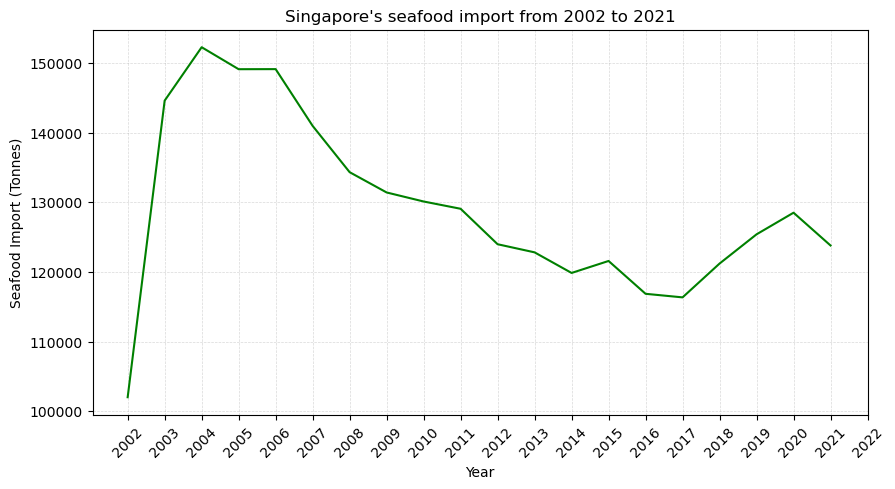

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(import_sum, color='green')
plt.title("Singapore's seafood import from 2002 to 2021")
plt.xlabel('Year')
plt.ylabel('Seafood Import (Tonnes)')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha = 0.3)
plt.xticks(np.arange(2002,2023,1), rotation = 45)
plt.show()

Figure 5 shows a line graph of total seafood import for each year from 2002 to 2021. <br>It is interesting to note that the seafood import has been decreasing since 2006 and steadily increasing from 2017 onwards. The decreased observed from 2020 to 2021 could be due to the COVID-19 pandemic period.

Based on Figure 5, another possible category to analyse would be the amount of seafood exported. It could be possible that as seafood import increases from 2017, the seafood export decreases.

#### Figure 6. Line plot of Singapore's seafood export

In [85]:
# Calculate total seafood export by year.
export_sum = df.groupby(df['month'].dt.year)['exports_of_seafood'].sum()
export_sum = pd.DataFrame(export_sum)
export_sum.head()

,exports_of_seafood
month,
2002,57923.0
2003,60576.0
2004,67839.0
2005,60694.0
2006,59025.0


In [86]:
# Drop year 2022
export_sum.drop(2022, inplace=True)

The year 2022 was dropped as the data does not contain the full year. The data is until May 2022. Hence, there will be a sharp decrease in seafood export when the line graph is plotted which is not representative of the entire 2022.

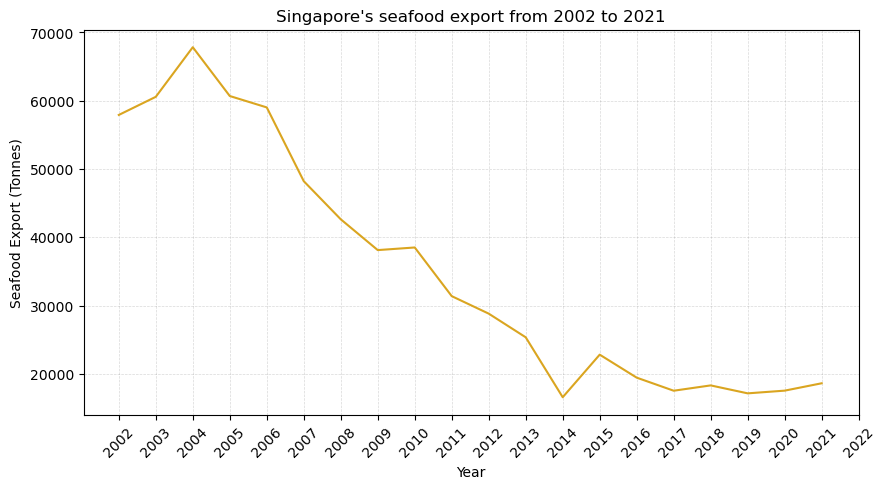

In [87]:
plt.figure(figsize=(10, 5))
ax = plt.plot(export_sum, color='goldenrod')
plt.title("Singapore's seafood export from 2002 to 2021")
plt.xlabel('Year')
plt.ylabel('Seafood Export (Tonnes)')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha = 0.3)
plt.xticks(np.arange(2002,2023,1), rotation = 45)
plt.show()

Figure 6 shows a line graph of total seafood export for each year from 2002 to 2021. <br>
Interestingly, the export of seafood seems to follow a similar decreasing trend as seafood import in Figure 5. From 2017 onwards, the seafood export does not seem to decrease as expected.

#### Figure 7. Line plot of Singapore seafood catch, import and export

In [88]:
# Calculate total import of seafood by year.
catch_sum = df.groupby(df['month'].dt.year)['seafood_catch'].sum()
catch_sum = pd.DataFrame(catch_sum)
catch_sum.head()

,seafood_catch
month,
2002,2769.0
2003,2085.0
2004,2173.0
2005,1920.0
2006,3103.0


In [89]:
# Drop year 2022
catch_sum.drop(2022, inplace=True)

The year 2022 was dropped as the data does not contain the full year. The data is until May 2022. Hence, there will be a decrease in seafood catch when the line graph is plotted which is not representative of the entire 2022.

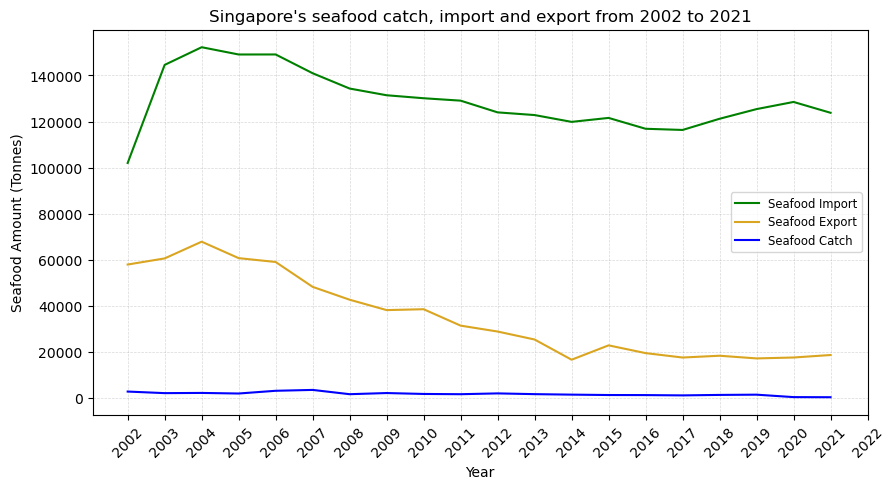

In [90]:
plt.figure(figsize=(10, 5))
plt.plot(import_sum, color='green', label = 'Seafood Import')
plt.plot(export_sum, color='goldenrod', label = 'Seafood Export')
plt.plot(catch_sum, color='blue', label = 'Seafood Catch')
plt.title("Singapore's seafood catch, import and export from 2002 to 2021")
plt.xlabel('Year')
plt.ylabel('Seafood Amount (Tonnes)')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha = 0.3)
plt.xticks(np.arange(2002,2023,1), rotation = 45)
plt.legend(loc = 'center right', fontsize = 'small');

plt.show()

Figure 7. shows an overview of seafood catch, seafood import and seafood export from 2002 to 2021. From the plot, we are able to see that both seafood import and seafood export follows a decreasing trend. However, the trend for seafood catch is not very visible. Hence, it is plotted in Figure 8 below for better visualisation.

#### Figure 8. Line plot of Singapore seafood catch

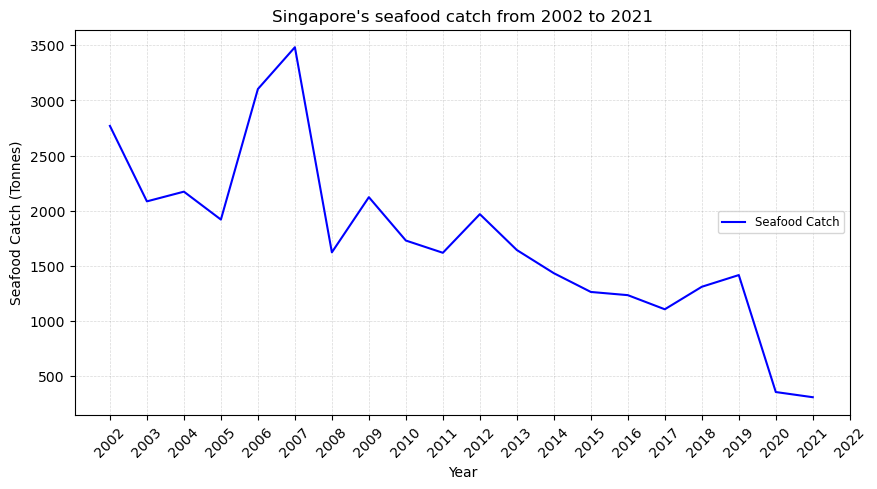

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(catch_sum, color='blue', label = 'Seafood Catch')
plt.title("Singapore's seafood catch from 2002 to 2021")
plt.xlabel('Year')
plt.ylabel('Seafood Catch (Tonnes)')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha = 0.3)
plt.xticks(np.arange(2002,2023,1), rotation = 45)
plt.legend(loc = 'center right', fontsize = 'small');

From Figure 8, we are able to see that the total seafood catch follows a decreasing trend after 2007. This matches the seafood catch decreased observed in Figure 3 and 4.

#### Table 3. Correlation

In [92]:
df.corr().round(2)

,month,seafood_catch,imports_of_seafood,exports_of_seafood,total_rainfall,month_mean_temp
month,1.00,-0.69,-0.33,-0.84,-0.08,0.26
seafood_catch,-0.69,1.00,0.28,0.60,0.01,-0.08
imports_of_seafood,-0.33,0.28,1.00,0.56,0.12,-0.07
exports_of_seafood,-0.84,0.60,0.56,1.00,-0.03,-0.11
total_rainfall,-0.08,0.01,0.12,-0.03,1.00,-0.53
month_mean_temp,0.26,-0.08,-0.07,-0.11,-0.53,1.00


Based on the correlation in Table 3, there does not seem to be any clear correlation between seafood catch with both temperature and total rainfall.

#### Results Interpretation

From Figure 1, we can tell that seafood catch decreases after 25.4°C. This aligns with results from studies showing that increased temperature affects the reproduction of fishes and survivability of marine creatures. Hence, leading to a decrease in amount of seafood caught. In Figure 2, it was observed that seafood catch decreases drastically when total rainfall was above 250mm. This observation matches the results from studies showing that increased rainfall decreases seawater salinity which in turn leads to decreased reproduction rate in fishes. Therefore, leading to a decreased amount of seafood caught. From Figure 3, it was observed that temperature has risen in the past 10 years which was confirmed from Table 1 and 2 where mean temperature rose from 24.96°C to 25.39°C. In addition, 
the mean total rainfall has also decreased from 189.1mm to 162.13mm, emphasizing the effects of global warming on Singapore's climate. In both Figure 3 and 4, the overall seafood catch was observed to have decreased and calculations have shown that seafood catch has decreased by 46.29% (10,475 Tonnes).
<br><br>
With decreasing seafood catch, you would expect that the seafood import would increase to make up for the reduced catch. However, the seafood import shown in Figure 5 has been decreasing since 2006 and only increasing from 2017 onwards. Likewise for seafood export shown in Figure 6, the amount exported does not seem to decrease from 2017 onwards.
<br><br>
Overall, based on the correlation shown in Table 3, no clear correlation was observed between seafood catch and temperature (-0.08), and between seafood catch and total rainfall (0.01).

## Conclusions and Recommendations

Based on the results, it is apparent that climate change poses a threat to Singapore's food sustainability. The results indicates that temperature has risen over the years and seafood catch in local waters have decreased significantly. As there seems to be no clear relationship established between surface air temperature, total rainfall versus seafood catch, other parameters could be measured to aid in the understanding of the relationship between climate and local seafood production. For instance, the amount of seafood produced by local fisheries could be measured. This would help us understand if local climate changes will affect seafood production as environmental conditions are more controlled in a fishery setting. Next, seawater chemical parameters (e.g., salinity, dissolved carbon dioxide concentration etc.) could be measured after a heavy rainfall or during a dry season as water chemical parameters have been known to affect the physiology of marine creatures. Hence, this will help to establish if changes in surface air temperature or heavy rainfall would significantly affect seafood catch. This will also aid local fisherman to maximise their catch and help local fisheries to better monitor the conditions of their livestock.

## References

1. MSE. (2023). Food. Retrieved from https://www.mse.gov.sg/policies/food/
2. [Marques, A., Nunes, M. L., Moore, S. K., & Strom, M. S. (2010). Climate change and seafood safety: Human health implications. Food Research International, 43(7), 1766-1779.](https://www.sciencedirect.com/science/article/abs/pii/S0963996910000682)<br><img src="../images/Climate change and seafood safety Human health implications.png">>
4. [Capotondi, A., Alexander, M. A., Bond, N. A., Curchitser, E. N., & Scott, J. D. (2012). Enhanced upper ocean stratification with climate change in the CMIP3 models. Journal of Geophysical Research: Oceans, 117(C4).](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1029/2011JC007409)<br <img src="../images/Enhanced upper ocean stratification with climate change in the CMIP3 models.png">>
5. [Servili, A., Canario, A. V., Mouchel, O., & Muñoz-Cueto, J. A. (2020). Climate change impacts on fish reproduction are mediated at multiple levels of the brain-pituitary-gonad axis. General and Comparative Endocrinology, 291, 113439.](https://www.sciencedirect.com/science/article/am/pii/S0016648019303880)<br><img src="../images/Climate change impacts on fish reproduction are mediated at multiple levels of the brain-pituitary-gonad axis_1.png"><br><img src="../images/Climate change impacts on fish reproduction are mediated at multiple levels of the brain-pituitary-gonad axis_2.png">
7. [Machado Toffolo, M., Grilli, F., Prandi, C., Goffredo, S., & Marini, M. (2022). Extreme Flooding Events in Coastal Lagoons: Seawater Parameters and Rainfall over A Six-Year Period in the Mar Menor (SE Spain). Journal of Marine Science and Engineering, 10(10), 1521](https://www.mdpi.com/2077-1312/10/10/1521#:~:text=This%20could%20be%20explained%20by%20the%20higher%20volume%20of%20precipitation%20in%202019%2C%20followed%20by%20smaller%20but%20still%20intense%20rainfall%20events%20occurring%20in%20the%20following%20year%20that%20contributed%20to%20a%20decrease%20in%20salinity%20for%20a%20longer%20period%20of%20time.) .